In [21]:
#importing data and libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# Loading the data 
url=("https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt")

In [7]:
df = pd.read_csv(url, index_col=0)
df.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
1,1177.698,2,7,2,2,2,62000
2,2134.800,5,7,4,2,2,78000
3,1138.560,5,7,2,2,1,58000
4,1458.780,2,7,3,2,2,45000
5,967.776,11,14,3,2,2,45000


In [10]:
#checking null values 
print(df.isnull().sum())

Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64


In [13]:
#checking duplicates 
print(df.duplicated().sum())

66


In [18]:
#droping duplicates 
df = df.drop_duplicates()

In [19]:
print(df.shape)

(579, 7)


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

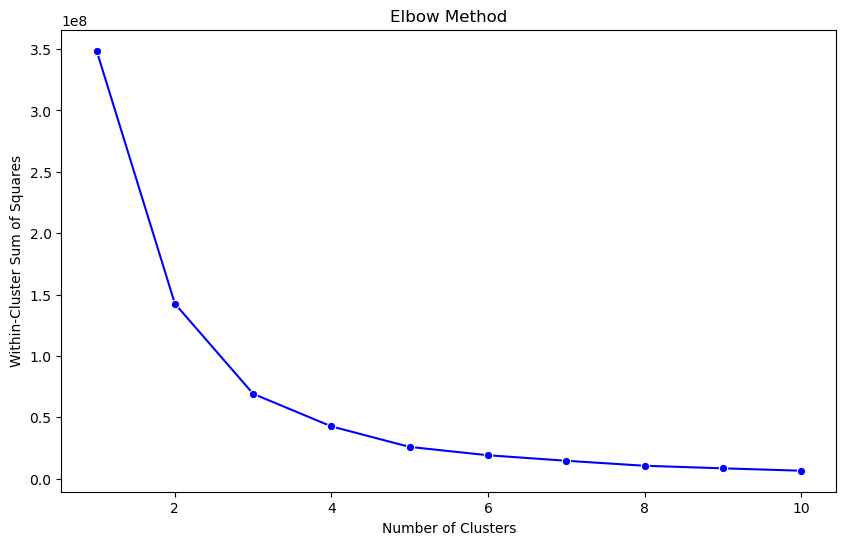

In [23]:
#columns for clustring 
X = df[[ 'Sqft', 'Floor','TotalFloor','Bedroom','Living.Room','Bathroom']]
#empty list to store the within-cluster sum of squares for values of k
wcss = []
# Iterate over k values from 1 to 10 and calculate the WCSS for each value of k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot for each value of k
plt.figure(figsize=(10, 6))
sns.lineplot(range(1, 11), wcss, marker='o', color='blue')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares')
plt.show()

In [24]:
# Perform k-means clustering with k=4
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(X)

# Add a new column to the DataFrame to store the cluster to which each house belongs
df['cluster'] = kmeans.labels_


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [25]:
# Display the data grouped by the cluster column
for cluster in range(4):
    print(f'Cluster {cluster}:')
    display(df[df['cluster'] == cluster].head())


Cluster 0:


,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price,cluster
16,2768.124,6,19,3,2,2,100000,0
19,2739.660,6,19,3,2,2,90000,0
25,3664.740,19,19,3,2,3,200000,0
28,3059.880,21,24,4,2,3,145000,0
39,3735.900,19,19,3,2,3,200000,0


Cluster 1:


,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price,cluster
1,1177.698,2,7,2,2,2,62000,1
3,1138.560,5,7,2,2,1,58000,1
4,1458.780,2,7,3,2,2,45000,1
6,1127.886,11,12,4,2,2,148000,1
7,1352.040,5,7,3,2,1,58000,1


Cluster 2:


,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price,cluster
5,967.776,11,14,3,2,2,45000,2
8,757.854,5,14,1,0,1,48000,2
11,668.904,4,11,1,1,1,31000,2
12,711.600,4,7,2,1,1,29002,2
14,818.340,4,13,2,2,1,48000,2


Cluster 3:


,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price,cluster
2,2134.800,5,7,4,2,2,78000,3
15,2134.800,10,19,3,2,2,55000,3
21,2490.600,19,21,5,3,4,140000,3
26,1779.000,10,12,4,2,2,98000,3
31,1732.746,8,12,4,2,2,65000,3
